In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploring the relationship between outcome(target) and independent vaiable

In [6]:
fea = df.iloc[:,:8]
target = df.iloc[:,-1]



<AxesSubplot:>

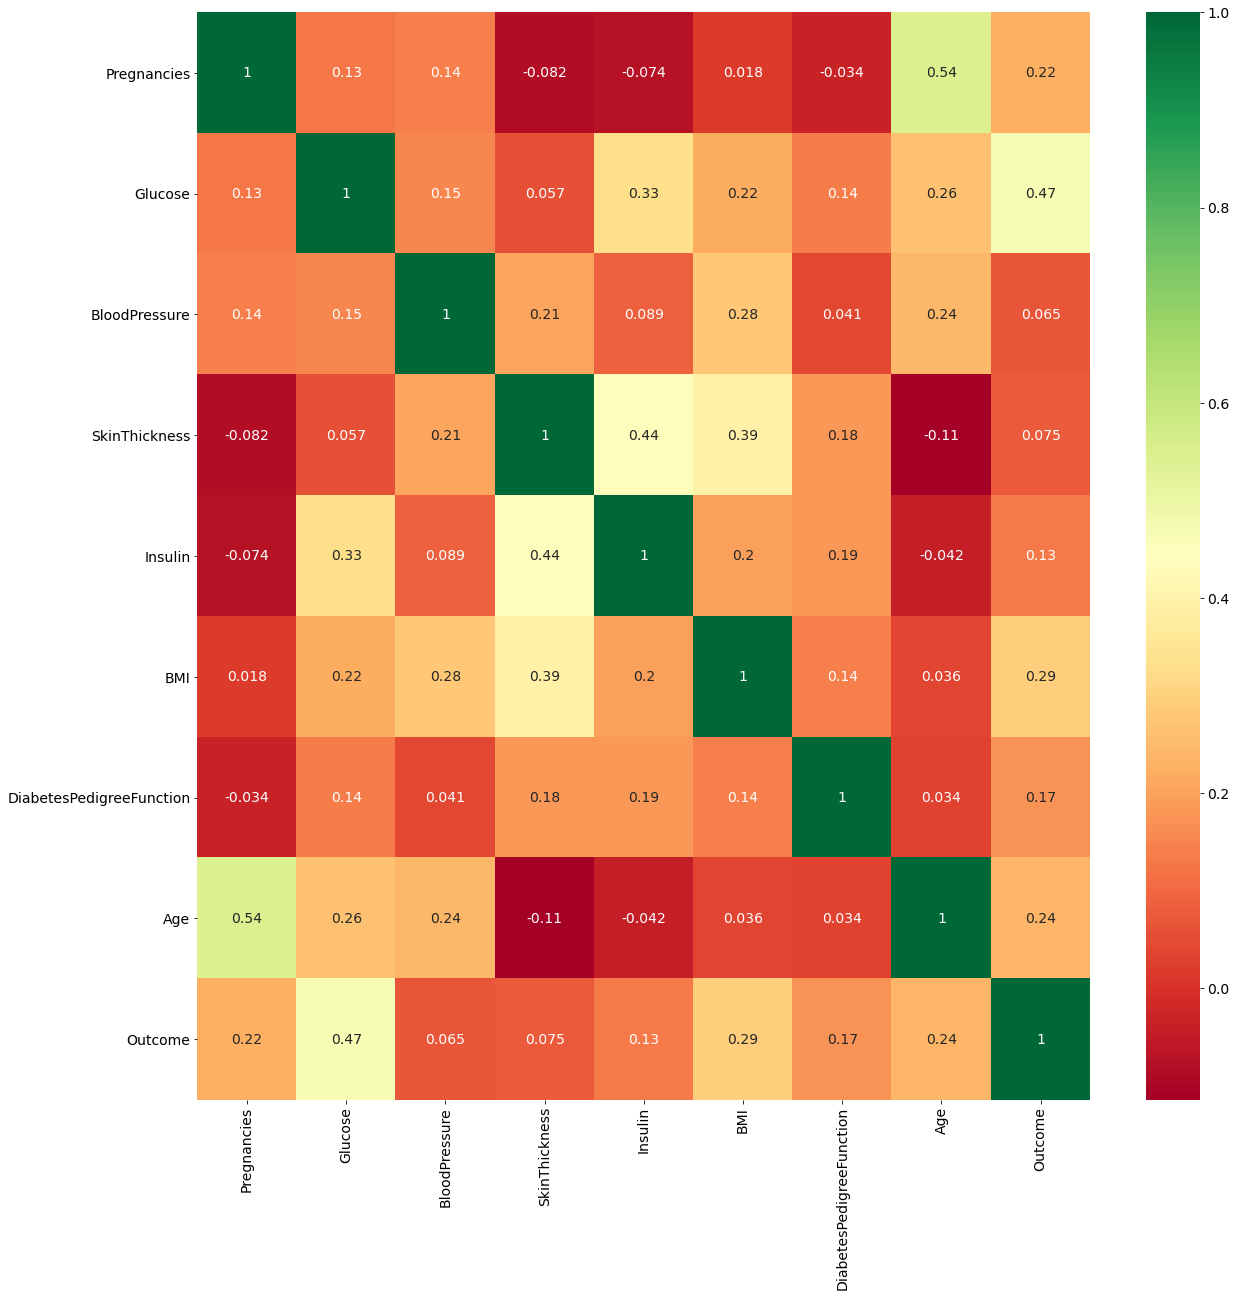

In [7]:
corrmat = df.corr()
top_fea = corrmat.index
plt.figure(figsize=(20,20))

sns.heatmap(df[top_fea].corr(), annot=True, cmap='RdYlGn')

<AxesSubplot:>

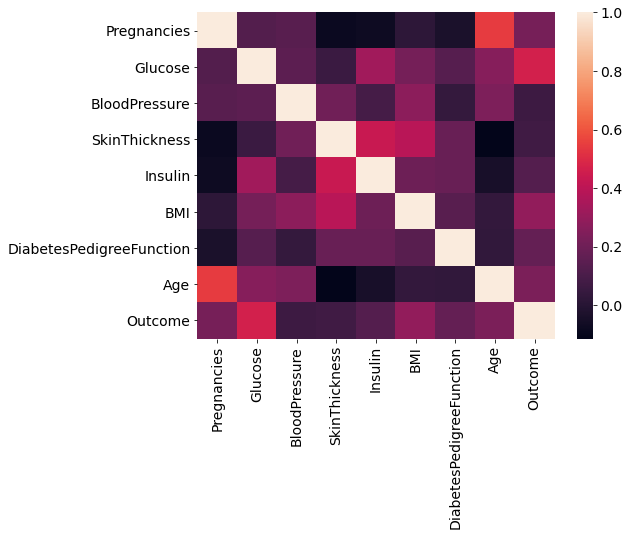

In [8]:
sns.heatmap(df.corr())

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Check whether data is balanced or not

In [10]:
# taking the length for counting
diabetes_present_count = len(df.loc[df['Outcome'] == 1])
diabetes_absent_count = len(df.loc[df['Outcome'] == 0])
(diabetes_present_count, diabetes_absent_count)

(268, 500)

# Finding out the missing values which are zero in the dataset

In [11]:
# as blood pressure of human cannot be zero 
print("size of data: ",len(df))
print("Glucose with 0 values: ",len(df[df.Glucose == 0]))
print("Bloodspressure with 0 values: ",len(df[df.BloodPressure == 0]))
print("Skin Thickness with 0 values: ",len(df[df.SkinThickness == 0]))
print("Insulin with 0 values: ",len(df[df.Insulin == 0]))
print("BMI with 0 values: ",len(df[df.BMI == 0]))
print("DiabetesPedigre  with 0 values: ",len(df[df.DiabetesPedigreeFunction == 0]))
print("Age with 0 values: ",len(df[df.Age == 0]))



size of data:  768
Glucose with 0 values:  5
Bloodspressure with 0 values:  35
Skin Thickness with 0 values:  227
Insulin with 0 values:  374
BMI with 0 values:  11
DiabetesPedigre  with 0 values:  0
Age with 0 values:  0


# Filling the missing values

In [12]:
from sklearn.impute import SimpleImputer

fill_val = SimpleImputer(missing_values=0, strategy='mean')


# Train and split

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

x = df.iloc[:,:8]
x_std = StandardScaler().fit_transform(x)

min_scalar = MinMaxScaler(feature_range=(0, 1))
x_min = min_scalar.fit_transform(x)
scaler = Normalizer().fit(x)
x_norm= scaler.transform(x)




y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x_std, y,test_size=0.30, random_state=123)
X_train = fill_val.fit_transform(X_train)
X_test= fill_val.fit_transform(X_test)

# Apply algorithm

In [14]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

logrig = LogisticRegression(random_state=123)
logrig.fit(X_train,y_train)
pre_log_data = logrig.predict(X_test)
print("accuracy score",round(metrics.accuracy_score(y_test, pre_log_data),3))



accuracy score 0.797


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pre_log_data))


              precision    recall  f1-score   support

           0       0.80      0.90      0.84       143
           1       0.79      0.64      0.70        88

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.77       231
weighted avg       0.80      0.80      0.79       231



In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pre_log_data))

[[128  15]
 [ 32  56]]
